In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_datareader import data as wb

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# companies I am looking for
tickers = ['BCE.TO','BPY-UN.TO','RY.TO','SU.TO', 'ENB.TO']
mystocks = pd.DataFrame()

# extract data from yahoo finance
for a in tickers:
    mystocks[a] = wb.DataReader(a, data_source = 'yahoo', start="2013-7-1")['Adj Close']
    


In [78]:
wb.get_data_fred("GS10")

,GS10
DATE,
2015-09-01,2.17
2015-10-01,2.07
2015-11-01,2.26
2015-12-01,2.24
2016-01-01,2.09
2016-02-01,1.78
2016-03-01,1.89
2016-04-01,1.81
2016-05-01,1.81


In [3]:
mystocks.head()

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO
Date,,,,,
2013-07-02,30.162237,15.553943,45.397285,24.953312,31.834698
2013-07-03,29.930817,15.289946,45.114151,24.921320,31.586428
2013-07-04,30.148211,15.575945,45.315315,24.873329,31.636084
2013-07-05,30.092110,15.766608,45.352573,24.897324,31.402006
2013-07-08,30.288483,15.627281,45.568649,25.273228,31.643177


In [4]:
# normalize the data 
normalized_data = mystocks / mystocks.iloc[0] * 100

# check for errors
print(normalized_data.head())
print(normalized_data.tail())

                BCE.TO   BPY-UN.TO       RY.TO       SU.TO      ENB.TO
Date                                                                  
2013-07-02  100.000000  100.000000  100.000000  100.000000  100.000000
2013-07-03   99.232748   98.302700   99.376319   99.871793   99.220128
2013-07-04   99.953496  100.141458   99.819438   99.679470   99.376108
2013-07-05   99.767499  101.367277   99.901509   99.775628   98.640818
2013-07-08  100.418555  100.471511  100.377476  101.282057   99.398390
                BCE.TO   BPY-UN.TO       RY.TO      SU.TO      ENB.TO
Date                                                                 
2020-08-18  188.679638  101.003330  214.374051  88.645551  136.360647
2020-08-19  189.176953  100.810454  215.189083  87.643680  136.077936
2020-08-20  189.773727  100.810454  215.695712  85.960536  135.763818
2020-08-21  190.834655  100.617573  215.695712  83.716340  135.826644
2020-08-24  190.967262  102.032007  217.854439  87.082627  136.329240


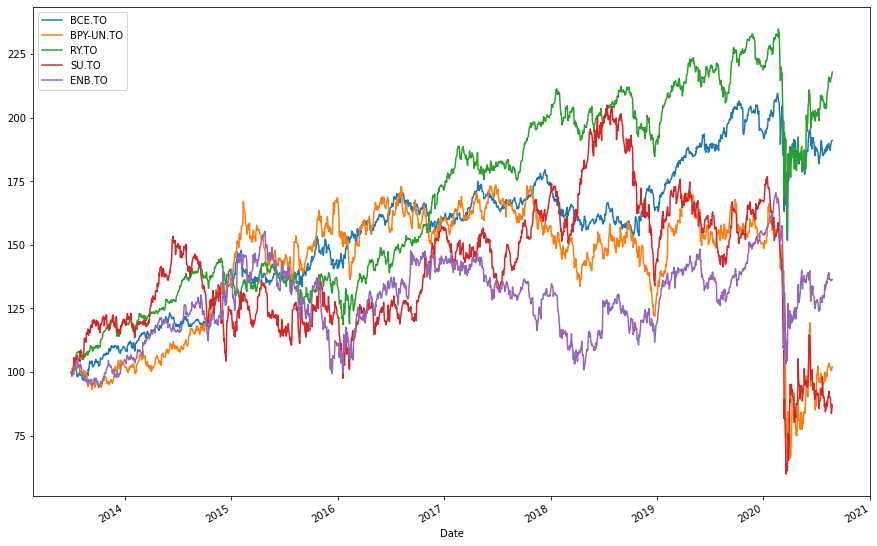

<Figure size 432x288 with 0 Axes>

In [79]:
# plt.figure(figsize=(15,10))
# sns.lineplot(data=normalized_data)
ax = normalized_data.plot(figsize = (15,10))

plt.show()
plt.savefig("growth_comparison.png")

In [6]:
# Calculate the return of the portfolio
# find the percentage change per day
returns = mystocks / mystocks.shift(1) - 1
returns.head()

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO
Date,,,,,
2013-07-02,NaN,NaN,NaN,NaN,NaN
2013-07-03,-0.007673,-0.016973,-0.006237,-0.001282,-0.007799
2013-07-04,0.007263,0.018705,0.004459,-0.001926,0.001572
2013-07-05,-0.001861,0.012241,0.000822,0.000965,-0.007399
2013-07-08,0.006526,-0.008837,0.004764,0.015098,0.007680


In [7]:
# weightings of each stock in the portfolio
# Assume 25% each first
weights = np.array([0.25,0.25,0.25,0.25,0.25])
weights

array([0.25, 0.25, 0.25, 0.25, 0.25])

In [8]:
np.dot(returns,weights)

array([        nan, -0.00999078,  0.00751841, ..., -0.00400096,
       -0.00549184,  0.01716788])

In [9]:
# use approximately 250 trading days to account for off market days
annual_returns = returns.mean() * 250
annual_returns

BCE.TO       0.103713
BPY-UN.TO    0.044446
RY.TO        0.124875
SU.TO        0.033351
ENB.TO       0.079054
dtype: float64

In [10]:
# estimate dot product
np.dot(annual_returns, weights)
portfolio = round(np.dot(annual_returns,weights),4)
print(f"This portfolio has a annual return of {portfolio * 100}%")

This portfolio has a annual return of 9.64%


### Calculating risk of the securities


In [11]:
# list out all companies within the portfolio
tickers

['BCE.TO', 'BPY-UN.TO', 'RY.TO', 'SU.TO', 'ENB.TO']

In [12]:
# Annual rate of returns
returns[tickers].mean() * 250

BCE.TO       0.103713
BPY-UN.TO    0.044446
RY.TO        0.124875
SU.TO        0.033351
ENB.TO       0.079054
dtype: float64

In [13]:
# standard deviations
# annualized standard deviations
returns[tickers].std() * (250 ** 0.5)

BCE.TO       0.163753
BPY-UN.TO    0.286712
RY.TO        0.180843
SU.TO        0.323084
ENB.TO       0.267483
dtype: float64

BCE and RBC have higher rate of returns and lower volatility percentage

In [14]:
# Calculate the variance 
returns[tickers].var() * 250

BCE.TO       0.026815
BPY-UN.TO    0.082204
RY.TO        0.032704
SU.TO        0.104383
ENB.TO       0.071547
dtype: float64

In [15]:
# Calculate the covariance (annualized)
cov_matrix = returns.cov() * 250
cov_matrix

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO
BCE.TO,0.026815,0.021475,0.018165,0.022388,0.022320
BPY-UN.TO,0.021475,0.082204,0.028114,0.037761,0.032578
RY.TO,0.018165,0.028114,0.032704,0.033648,0.028081
SU.TO,0.022388,0.037761,0.033648,0.104383,0.048920
ENB.TO,0.022320,0.032578,0.028081,0.048920,0.071547


In [16]:
# calculate the correlation betweeen stocks
corr_matrix = returns.corr()
corr_matrix

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO
BCE.TO,1.000000,0.457400,0.613405,0.423161,0.509573
BPY-UN.TO,0.457400,1.000000,0.542219,0.407643,0.424796
RY.TO,0.613405,0.542219,1.000000,0.575898,0.580518
SU.TO,0.423161,0.407643,0.575898,1.000000,0.566075
ENB.TO,0.509573,0.424796,0.580518,0.566075,1.000000


### Calculate Portfolio Risk

Assuming the stocks within the portfolio all have equal weightings

In [17]:
weights = np.array([0.20,0.2,0.2,0.2,0.2])

In [18]:
# portfolio variance
# transpose the vector using .T (matrix multiplication)
portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_var

0.036182080551894195

In [19]:
# portfolio volatility (standard deviation)
portfolio_vol = portfolio_var ** 0.5
portfolio_vol

0.19021587881113972

### Calculate Diversifiable and Non-diversifiable Risk of Portfolio
diversifiable risk = porfolio variance - weighted annual variances

In [20]:
# calculate annual variances for each stocks in the portfolio
stocks_var = returns[tickers].var()*250
tickers 

['BCE.TO', 'BPY-UN.TO', 'RY.TO', 'SU.TO', 'ENB.TO']

In [21]:
BCE_var = stocks_var[0]
BPY_var = stocks_var[1]
RY_var = stocks_var[2]
SU_var = stocks_var[3]
ENB_var = stocks_var[4]

In [22]:
# Diversifiable Risk:
diversifiable_risk = portfolio_var - (weights[0] ** 2 * BCE_var) - \
                                    (weights[1] ** 2 * BPY_var) - \
                                    (weights[2] ** 2 * RY_var) - \
                                    (weights[3] ** 2 * SU_var) - \
                                    (weights[4] ** 2 * ENB_var)
                
diversifiable_risk

0.023475956381631385

Through the formula we can see that the more companies you have within your portfoio the lower the diversifiable risk

In [23]:
# non-diversifiable risk
nondiversifiable_risk = portfolio_var - diversifiable_risk
nondiversifiable_risk

0.01270612417026281

In [24]:
print(f"The Diversifiable risk is {round(diversifiable_risk,4)*100}%")
print(f"The non-diversifiable risk is {round(nondiversifiable_risk,4)*100}%")

The Diversifiable risk is 2.35%
The non-diversifiable risk is 1.27%


### Obtaining the efficient frontier

In [25]:
mystocks


,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO
Date,,,,,
2013-07-02,30.162237,15.553943,45.397285,24.953312,31.834698
2013-07-03,29.930817,15.289946,45.114151,24.921320,31.586428
2013-07-04,30.148211,15.575945,45.315315,24.873329,31.636084
2013-07-05,30.092110,15.766608,45.352573,24.897324,31.402006
2013-07-08,30.288483,15.627281,45.568649,25.273228,31.643177
...,...,...,...,...,...
2020-08-18,56.910000,15.710000,97.320000,22.120001,43.410000
2020-08-19,57.060001,15.680000,97.690002,21.870001,43.320000
2020-08-20,57.240002,15.680000,97.919998,21.450001,43.220001


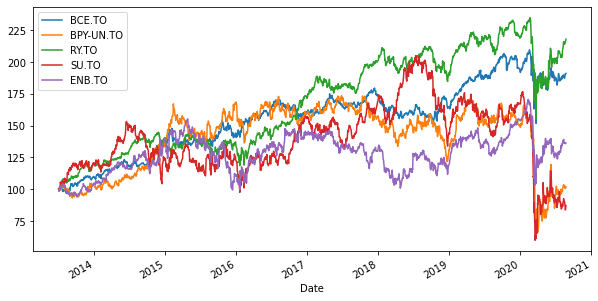

In [26]:
normalized_data.plot(figsize = (10,5))

In [27]:
# log returns
log_returns = np.log(mystocks / mystocks.shift(1))
log_returns.head()

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO
Date,,,,,
2013-07-02,NaN,NaN,NaN,NaN,NaN
2013-07-03,-0.007702,-0.017119,-0.006256,-0.001283,-0.007829
2013-07-04,0.007237,0.018532,0.004449,-0.001928,0.001571
2013-07-05,-0.001863,0.012167,0.000822,0.000964,-0.007427
2013-07-08,0.006505,-0.008876,0.004753,0.014985,0.007651


In [28]:
log_returns.sum()

BCE.TO       0.646932
BPY-UN.TO    0.020116
RY.TO        0.778657
SU.TO       -0.138313
ENB.TO       0.309903
dtype: float64

In [29]:
# get the annual returns
print(log_returns.mean() * 250)

# get the covariance
print(log_returns.cov() * 250)

# get the correlation matrices
log_returns.corr()

BCE.TO       0.090202
BPY-UN.TO    0.002805
RY.TO        0.108569
SU.TO       -0.019285
ENB.TO       0.043210
dtype: float64
             BCE.TO  BPY-UN.TO     RY.TO     SU.TO    ENB.TO
BCE.TO     0.027113   0.022404  0.018244  0.023272  0.022677
BPY-UN.TO  0.022404   0.084040  0.029000  0.040317  0.033946
RY.TO      0.018244   0.029000  0.032542  0.034477  0.028169
SU.TO      0.023272   0.040317  0.034477  0.105993  0.050813
ENB.TO     0.022677   0.033946  0.028169  0.050813  0.071904


,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO
BCE.TO,1.000000,0.469336,0.614215,0.434121,0.513601
BPY-UN.TO,0.469336,1.000000,0.554542,0.427180,0.436689
RY.TO,0.614215,0.554542,1.000000,0.587043,0.582332
SU.TO,0.434121,0.427180,0.587043,1.000000,0.582053
ENB.TO,0.513601,0.436689,0.582332,0.582053,1.000000


In [30]:
num_companies = len(tickers)
num_companies

5

In [31]:
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [32]:
# make weights equal to one:
weights = np.random.random(num_companies)
# divide by the sum to make weights sum to 1
weights /= np.sum(weights)
weights

array([0.38837775, 0.05674874, 0.28435661, 0.23920689, 0.03131001])

In [33]:
# check if the sum of weight equates to 1
sum(weights)

1.0000000000000002

In [34]:
# Expected Portfolio Return
np.sum(weights * log_returns.mean() * 250)

0.06280388197802819

In [35]:
weights*log_returns.mean() * 250

BCE.TO       0.035033
BPY-UN.TO    0.000159
RY.TO        0.030872
SU.TO       -0.004613
ENB.TO       0.001353
dtype: float64

In [36]:
# expected portfolio variance
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.031123974099716258

In [37]:
# Expected portfolio volatility (standard deviation)
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250,weights)))

0.17641988011478824

In [38]:
test = np.random.random(num_companies)
sum(test / np.sum(test))

1.0

In [39]:
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for x in range (1000):
    weights = np.random.random(num_companies)
    weights /= np.sum(weights)
    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))


    
# change portfolio_returns and volatilities into numpy arrays
# portfolio_returns,portfolio_volatilities

In [40]:
len(portfolio_returns)

1000

In [41]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

In [42]:
weights

array([0.0235009 , 0.12163782, 0.47523086, 0.01598279, 0.36364763])

In [43]:
# create a dataframe to store the values
portfolio = pd.DataFrame({"Return":portfolio_returns,
                         "Volatility": portfolio_volatilities})
portfolio

,Return,Volatility
0,0.046951,0.195076
1,0.010407,0.229518
2,0.036943,0.212943
3,0.048250,0.192368
4,0.055827,0.186123
...,...,...
995,0.019681,0.218285
996,0.058086,0.189328
997,0.069706,0.174079
998,0.050076,0.187408


In [44]:
# include the weightings of the stocks 
for counter, symbol in enumerate(mystocks.columns.tolist()):
    print(counter,symbol)
    portfolio[f"{symbol} weight"] = [w[counter] for w in portfolio_weights]

0 BCE.TO
1 BPY-UN.TO
2 RY.TO
3 SU.TO
4 ENB.TO


In [45]:
portfolio.tail()

,Return,Volatility,BCE.TO weight,BPY-UN.TO weight,RY.TO weight,SU.TO weight,ENB.TO weight
995,0.019681,0.218285,0.193261,0.335101,0.066409,0.374611,0.030619
996,0.058086,0.189328,0.066582,0.209389,0.450916,0.148234,0.124878
997,0.069706,0.174079,0.406163,0.076888,0.178916,0.018839,0.319195
998,0.050076,0.187408,0.315884,0.112950,0.218720,0.283376,0.069071
999,0.069461,0.190911,0.023501,0.121638,0.475231,0.015983,0.363648


In [46]:
portfolio.corr()

,Return,Volatility,BCE.TO weight,BPY-UN.TO weight,RY.TO weight,SU.TO weight,ENB.TO weight
Return,1.000000,-0.907344,0.520966,-0.438691,0.629925,-0.653312,-0.095611
Volatility,-0.907344,1.000000,-0.719011,0.241498,-0.408387,0.667236,0.266563
BCE.TO weight,0.520966,-0.719011,1.000000,-0.230951,-0.212986,-0.318924,-0.302050
BPY-UN.TO weight,-0.438691,0.241498,-0.230951,1.000000,-0.280073,-0.245242,-0.227237
RY.TO weight,0.629925,-0.408387,-0.212986,-0.280073,1.000000,-0.212285,-0.275561
SU.TO weight,-0.653312,0.667236,-0.318924,-0.245242,-0.212285,1.000000,-0.192410
ENB.TO weight,-0.095611,0.266563,-0.302050,-0.227237,-0.275561,-0.192410,1.000000


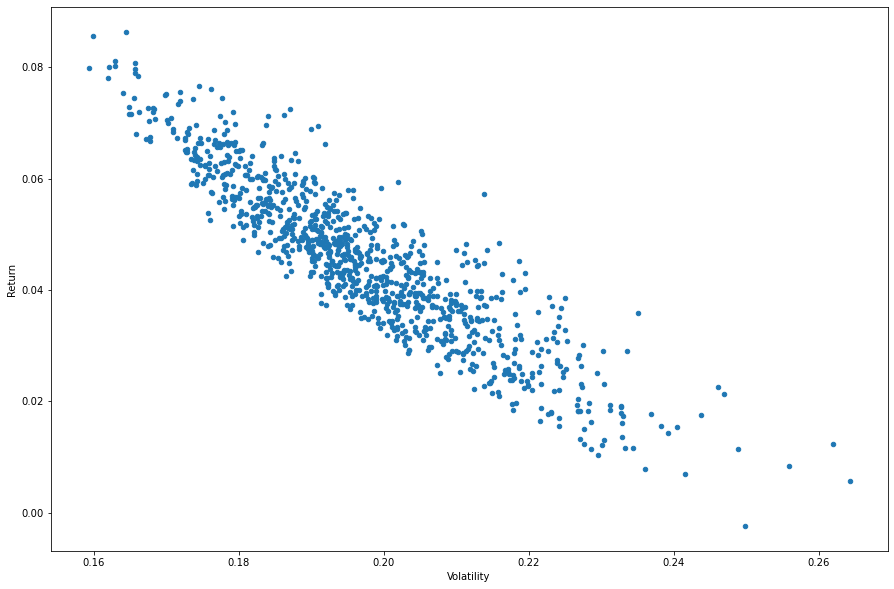

In [47]:
portfolio.plot(x='Volatility', y='Return', kind = "scatter", figsize=(15,10))

### Calculating the Beta of a stock

Using data from the past 5 years

In [48]:
tickers.append("^GSPC")


In [49]:
tickers

['BCE.TO', 'BPY-UN.TO', 'RY.TO', 'SU.TO', 'ENB.TO', '^GSPC']

In [50]:
data = pd.DataFrame()
for a in tickers:
    data[a] = wb.DataReader(a, data_source='yahoo',start="2015-1-1")['Adj Close']

In [51]:
data.head()

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO,^GSPC
Date,,,,,,
2015-01-02,40.627022,21.182819,63.627190,30.995632,44.727566,2058.199951
2015-01-05,40.165615,21.284811,62.192207,29.642946,42.967751,2020.579956
2015-01-06,40.460621,21.284811,61.750690,29.236307,41.414959,2002.609985
2015-01-07,41.148949,21.630011,61.774330,29.277809,41.052643,2025.900024
2015-01-08,41.459087,21.724163,62.152786,29.858709,41.511086,2062.139893


In [52]:
log_returns = np.log(data / data.shift(1))

In [53]:
log_returns

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO,^GSPC
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.011422,0.004803,-0.022811,-0.044622,-0.040140,-0.018447
2015-01-06,0.007318,0.000000,-0.007125,-0.013813,-0.036808,-0.008933
2015-01-07,0.016869,0.016088,0.000383,0.001419,-0.008787,0.011563
2015-01-08,0.007509,0.004343,0.006108,0.019647,0.011105,0.017730
...,...,...,...,...,...,...
2020-08-18,0.008293,-0.009503,0.002263,-0.014808,-0.000230,0.002301
2020-08-19,0.002632,-0.001911,0.003795,-0.011366,-0.002075,-0.004414
2020-08-20,0.003150,0.000000,0.002352,-0.019391,-0.002311,0.003154


I need the covaraince between each companies and the SP500 which is used to represent the overall market performance

I also need the variance of the SP500

In [54]:
# annualized covariance matrix
cov = log_returns.cov() * 250
cov

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO,^GSPC
BCE.TO,0.031253,0.027137,0.022033,0.028170,0.028290,0.019969
BPY-UN.TO,0.027137,0.099757,0.035541,0.049735,0.041421,0.033597
RY.TO,0.022033,0.035541,0.038389,0.041415,0.034614,0.027232
SU.TO,0.028170,0.049735,0.041415,0.120684,0.061687,0.037025
ENB.TO,0.028290,0.041421,0.034614,0.061687,0.083364,0.033084
^GSPC,0.019969,0.033597,0.027232,0.037025,0.033084,0.035948


In [55]:
len(cov)

6

In [56]:
# find the covariance between the stocks and the market
# select the GSPC column
cov_wmarket = cov.loc[cov.index[0:len(cov)-1],"^GSPC"]

In [57]:
cov_wmarket

BCE.TO       0.019969
BPY-UN.TO    0.033597
RY.TO        0.027232
SU.TO        0.037025
ENB.TO       0.033084
Name: ^GSPC, dtype: float64

In [58]:

# nominator
market_variance = log_returns['^GSPC'].var() * 250
market_variance

0.03594784650896748

Beta = (covariance between the stock and the market) / (varaince of the market)

In [59]:
tickers
cov_wmarket

BCE.TO       0.019969
BPY-UN.TO    0.033597
RY.TO        0.027232
SU.TO        0.037025
ENB.TO       0.033084
Name: ^GSPC, dtype: float64

In [60]:
BCE_beta = cov_wmarket["ENB.TO"] / market_variance
BCE_beta

0.9203357825332271

In [61]:
market_variance

0.03594784650896748

In [62]:

# create dictionary to store values
beta_dict = {}
for m in cov_wmarket.index:
    beta_list = []
    beta_list.append(cov_wmarket[m] / market_variance)
    beta_dict[m + "_beta"] = beta_list

In [63]:
beta_dict

{'BCE.TO_beta': [0.5555000194564331],
 'BPY-UN.TO_beta': [0.9345943812217754],
 'RY.TO_beta': [0.7575455570206711],
 'SU.TO_beta': [1.0299631193661465],
 'ENB.TO_beta': [0.9203357825332271]}

In [64]:
# put the dictionary of betas in a dataframe for easier manipulation
beta_df = pd.DataFrame(beta_dict)
beta_df = beta_df.transpose()
beta_df.rename(columns={0:"beta"},inplace=True)

In [65]:
beta_df

,beta
BCE.TO_beta,0.555500
BPY-UN.TO_beta,0.934594
RY.TO_beta,0.757546
SU.TO_beta,1.029963
ENB.TO_beta,0.920336


### Applying CAPM

To calculate the CAPM, I will need to calculate:
* risk-free rate 
    * I will be using the yield of the 10 year government bond because it's concluded by academics to be the closest to risk free
    * the rate is obtained from the bloomberg website
    <a href = "https:www.bloomberg.com/markets/rates-bonds/government-bonds/us" target = "_blank">Bloomberg Website</a>
* Beta : calculated earlier
* Equity Risk Premium
    * can be calculate by subtracting the risk-free rate from the expected market return. it's the compensation to expect when buying the portfolio
    * usually between 4.5% to 5.5% so I will use 5% in my analysis

In [66]:
BCE_er = 0.025 + beta_df.loc["BCE.TO_beta"]['beta'] * 0.05
BCE_er

0.05277500097282166

In [67]:
beta_df.loc["BCE.TO_beta"]['beta'] * 0.05

0.027775000972821658

In [68]:
beta_df

,beta
BCE.TO_beta,0.555500
BPY-UN.TO_beta,0.934594
RY.TO_beta,0.757546
SU.TO_beta,1.029963
ENB.TO_beta,0.920336


In [69]:
beta_df['expected_return'] = 0.025 + beta_df*0.05

In [70]:
beta_df['expected_return']['BCE.TO_beta']

0.05277500097282166

### Sharpe Ratio

In [71]:
log_returns

,BCE.TO,BPY-UN.TO,RY.TO,SU.TO,ENB.TO,^GSPC
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.011422,0.004803,-0.022811,-0.044622,-0.040140,-0.018447
2015-01-06,0.007318,0.000000,-0.007125,-0.013813,-0.036808,-0.008933
2015-01-07,0.016869,0.016088,0.000383,0.001419,-0.008787,0.011563
2015-01-08,0.007509,0.004343,0.006108,0.019647,0.011105,0.017730
...,...,...,...,...,...,...
2020-08-18,0.008293,-0.009503,0.002263,-0.014808,-0.000230,0.002301
2020-08-19,0.002632,-0.001911,0.003795,-0.011366,-0.002075,-0.004414
2020-08-20,0.003150,0.000000,0.002352,-0.019391,-0.002311,0.003154


In [72]:
# Sharpe = (beta_df['expected_return']['BPY-UN.TO_beta'] - 0.025) / \
#         (log_returns['BPY-UN.TO'].std() * 250 **0.5)
# Sharpe

In [73]:
placeholder_list = []
for num in range(len(log_returns.columns)-1):
    placeholder_list.append((beta_df.iloc[num]['expected_return'] - 0.025) / \
    (log_returns[log_returns.columns[num]].std() * 250 ** 0.5))

In [74]:
placeholder_list

[0.15711080977714975,
 0.1479521531777488,
 0.19332055660104258,
 0.1482406310326595,
 0.15937771572068132]

In [75]:
beta_df['Sharpe'] = placeholder_list

In [76]:
beta_df

,beta,expected_return,Sharpe
BCE.TO_beta,0.555500,0.052775,0.157111
BPY-UN.TO_beta,0.934594,0.071730,0.147952
RY.TO_beta,0.757546,0.062877,0.193321
SU.TO_beta,1.029963,0.076498,0.148241
ENB.TO_beta,0.920336,0.071017,0.159378


In [77]:
beta_df.iloc[0]['expected_return']

0.05277500097282166